In [26]:
# Imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
from scipy.stats import t

# Explore the behaviours of malicious users 
1. PCA: Malicious VS Non-Malicious

- PCA loadings help identify key behaviors and personality traits that define variance in user activity data.
- Behaviors include file copying and domain interactions; personality traits are derived from the OCEAN model.
- Comparative analysis of PCA loadings between malicious and non-malicious users reveals distinct patterns:
  - Certain features are more prominent among malicious users, differentiating their behavior from non-malicious users.


In [33]:
processed_dir = os.path.join( "..", "data", "processed")
final_dataset_path = os.path.join(processed_dir, 'FEData_For_Modelling.parquet')
highimportancepcafeatures_path = os.path.join(processed_dir, 'highimportance_PCAfeatures_graph.pickle')

# Figures
figures_dir = os.path.join( "..", "materials", "reports", "figures")
pca_all_path = os.path.join(figures_dir, 'pca_all.png')
pca_non_mal_path = os.path.join(figures_dir, 'pca_non_mal.png')
pca_mal_path = os.path.join(figures_dir, 'pca_mal.png')


In [29]:
# Read the multi-part Parquet dataset
data = pd.read_parquet(final_dataset_path).reset_index(drop = True)
data.head(4000)

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246,False
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679,False
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025,False
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2,False
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494,False
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322,False
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7,False
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810,False


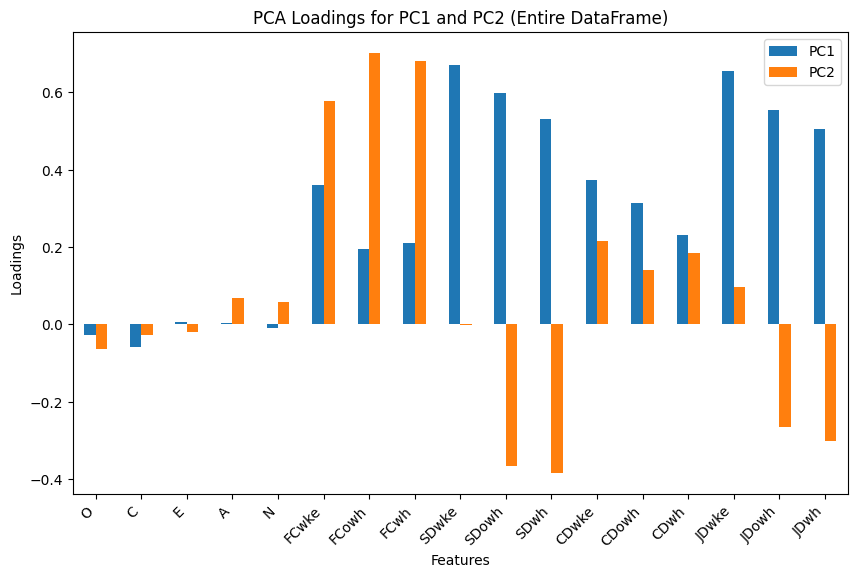

PCA Loadings for PC1 and PC2 (Entire DataFrame):
            PC1       PC2
O     -0.027438 -0.063714
C     -0.058659 -0.027575
E      0.006821 -0.018724
A      0.004482  0.069755
N     -0.008042  0.058521
FCwke  0.360245  0.578797
FCowh  0.196360  0.701848
FCwh   0.209770  0.682578
SDwke  0.672074 -0.000204
SDowh  0.597861 -0.366508
SDwh   0.532451 -0.384308
CDwke  0.372612  0.215637
CDowh  0.314416  0.140781
CDwh   0.232068  0.184068
JDwke  0.655284  0.095992
JDowh  0.553772 -0.265114
JDwh   0.505562 -0.300899


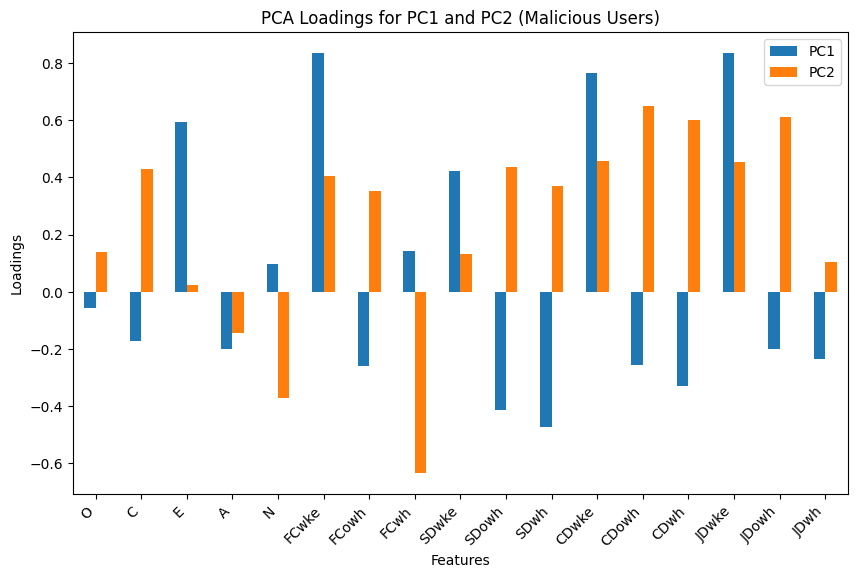

PCA Loadings for PC1 and PC2 (Malicious Users):
            PC1       PC2
O     -0.055193  0.138337
C     -0.172176  0.430476
E      0.592929  0.022325
A     -0.200634 -0.144464
N      0.098203 -0.370682
FCwke  0.834811  0.405964
FCowh -0.257898  0.351602
FCwh   0.144348 -0.633621
SDwke  0.421730  0.133880
SDowh -0.413102  0.438007
SDwh  -0.471289  0.368672
CDwke  0.763659  0.457594
CDowh -0.255594  0.649535
CDwh  -0.330020  0.602178
JDwke  0.834346  0.455694
JDowh -0.201083  0.610376
JDwh  -0.235523  0.105157


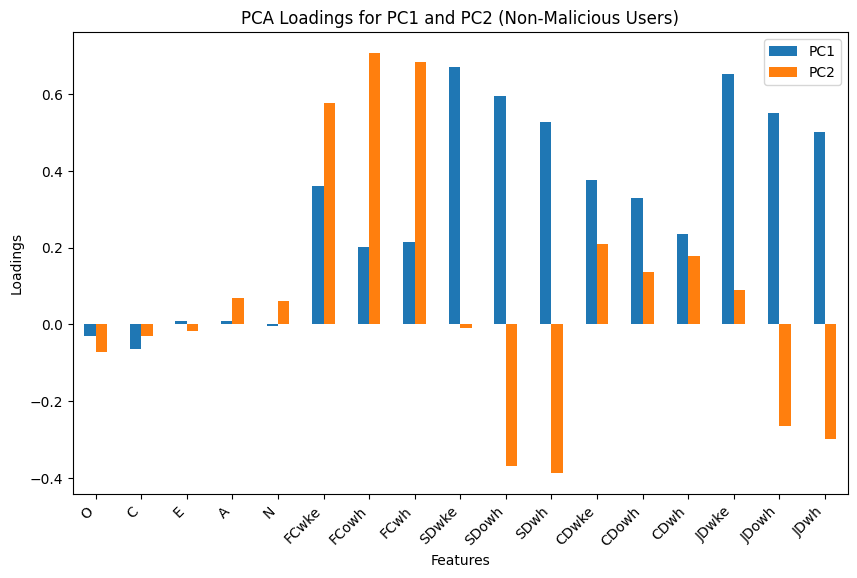

PCA Loadings for PC1 and PC2 (Non-Malicious Users):
            PC1       PC2
O     -0.029445 -0.070902
C     -0.064188 -0.030363
E      0.008781 -0.017228
A      0.007937  0.067690
N     -0.003798  0.061966
FCwke  0.361692  0.576643
FCowh  0.201905  0.707474
FCwh   0.214545  0.685535
SDwke  0.670831 -0.008116
SDowh  0.595759 -0.369703
SDwh   0.528727 -0.387623
CDwke  0.375698  0.209557
CDowh  0.329856  0.136683
CDwh   0.236599  0.178769
JDwke  0.654171  0.088809
JDowh  0.551634 -0.263972
JDwh   0.503005 -0.299445


In [37]:
pca_df = data.copy()
features = ['O', 'C', 'E', 'A', 'N', 'FCwke', 'FCowh', 'FCwh', 'SDwke', 'SDowh', 'SDwh', 'CDwke', 'CDowh', 'CDwh', 'JDwke', 'JDowh', 'JDwh']

X = pca_df[features]
X_std = (X - X.mean()) / X.std()

pca_all = PCA()
pca_all.fit(X_std)
loadings_all_pc1_pc2 = pca_all.components_[:2].T * np.sqrt(pca_all.explained_variance_[:2])

loadings_all_df = pd.DataFrame(loadings_all_pc1_pc2, columns=['PC1', 'PC2'], index=features)

plt.figure(figsize=(10, 6))
loadings_all_df.plot(kind='bar', ax=plt.gca())
plt.title('PCA Loadings for PC1 and PC2 (Entire DataFrame)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45, ha='right')
plt.savefig(pca_all_path)
plt.show()

print("PCA Loadings for PC1 and PC2 (Entire DataFrame):")
print(loadings_all_df)

malicious_df = pca_df[pca_df['malicious'] == 1]

X_malicious = malicious_df[features]
X_std_malicious = (X_malicious - X_malicious.mean()) / X_malicious.std()

pca_malicious = PCA()
pca_malicious.fit(X_std_malicious)
loadings_malicious_pc1_pc2 = pca_malicious.components_[:2].T * np.sqrt(pca_malicious.explained_variance_[:2])

loadings_malicious_df = pd.DataFrame(loadings_malicious_pc1_pc2, columns=['PC1', 'PC2'], index=features)

plt.figure(figsize=(10, 6))
loadings_malicious_df.plot(kind='bar', ax=plt.gca())
plt.title('PCA Loadings for PC1 and PC2 (Malicious Users)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45, ha='right')
plt.savefig(pca_mal_path)

plt.show()


print("PCA Loadings for PC1 and PC2 (Malicious Users):")
print(loadings_malicious_df)

non_malicious_df = pca_df[pca_df['malicious'] == 0]

X_nonmalicious = non_malicious_df[features]
X_std_nonmalicious = (X_nonmalicious - X_nonmalicious.mean()) / X_nonmalicious.std()

pca_nonmalicious = PCA()
pca_nonmalicious.fit(X_std_nonmalicious)
loadings_nonmalicious_pc1_pc2 = pca_nonmalicious.components_[:2].T * np.sqrt(pca_nonmalicious.explained_variance_[:2])

loadings_nonmalicious_df = pd.DataFrame(loadings_nonmalicious_pc1_pc2, columns=['PC1', 'PC2'], index=features)

plt.figure(figsize=(10, 6))
loadings_nonmalicious_df.plot(kind='bar', ax=plt.gca())
plt.title('PCA Loadings for PC1 and PC2 (Non-Malicious Users)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45, ha='right')
plt.savefig(pca_non_mal_path)

plt.show()


print("PCA Loadings for PC1 and PC2 (Non-Malicious Users):")
print(loadings_nonmalicious_df)


## PCA Loadings Analysis

### Entire DataFrame:
- **PC1**: Positive loadings for behaviors outside of standard work hours, especially `FCwke`, `SDwke`, `JDwke`.
- **PC2**: `FCowh`, `FCwh`, and `FCwke` have significant positive loadings; `SDowh` and `SDwh` show negative correlations.

### Malicious Users:
- **PC1**: High positive loadings for weekend activities (`FCwke`, `CDwke`, `JDwke`) and negative for some domain interactions (`SDowh`, `SDwh`).
- **PC2**: `C`, `CDowh`, `CDwh`, `JDowh`, and `FCowh` stand out with positive loadings; `N`, `FCwh`, and `A` are inversely related.

### Non-Malicious Users:
- **PC1 & PC2**: Loading patterns are similar to the entire dataset, suggesting consistent behaviors across all users.

### Comparative Insights:
- **Behavioral Patterns**: Malicious users' loadings highlight weekend and after-hours activities as significant behavior indicators.
- **OCEAN Traits**: Differences in `C` and `N` loadings between malicious and non-malicious users suggest a correlation with malicious behaviors.
- **Principal Component Focus**: For malicious users, PC1 emphasizes weekend activities, while PC2 captures a contrast between conscientiousness and domain activity against neuroticism and work hour activities.

These PCA loadings suggest that certain time-related behaviors and personality traits could be predictive of malicious activities.


In [15]:
df = data.copy()

Code below takes 1h to run, use G_highimportancePCAfeatures.pickle

In [ ]:
# Selecting the high importance features from PCA
high_importance_features = ['FCwke', 'CDwke', 'JDwke', 'SDowh', 'SDwh', 'C', 'CDowh', 'CDwh', 'JDowh', 'FCowh', 'N', 'FCwh', 'A']

# Create a new DataFrame with only the high importance features
high_importance_df = df[high_importance_features]

# Create a network graph
G_highimportancePCAfeatures = nx.Graph()

# Add nodes with color attribute based on maliciousness
node_color_map = {0: 'blue', 1: 'red'}
for i, row in df.iterrows():
    G_highimportancePCAfeatures.add_node(row['user'], color=node_color_map[row['malicious']])

# Adding edges between users based on similarity in high importance features
for i, row in high_importance_df.iterrows():
    print(i)
    for j in range(i+1, len(high_importance_df)):
        row2 = high_importance_df.iloc[j]
        similarity = sum(abs(row - row2))  # Manhattan distance
        if similarity < 20:  # Adjust threshold as needed
            G_highimportancePCAfeatures.add_edge(df.iloc[i]['user'], df.iloc[j]['user'], weight=similarity)

pickle.dump(G_highimportancePCAfeatures, open(highimportancepcafeatures_path, 'wb'))

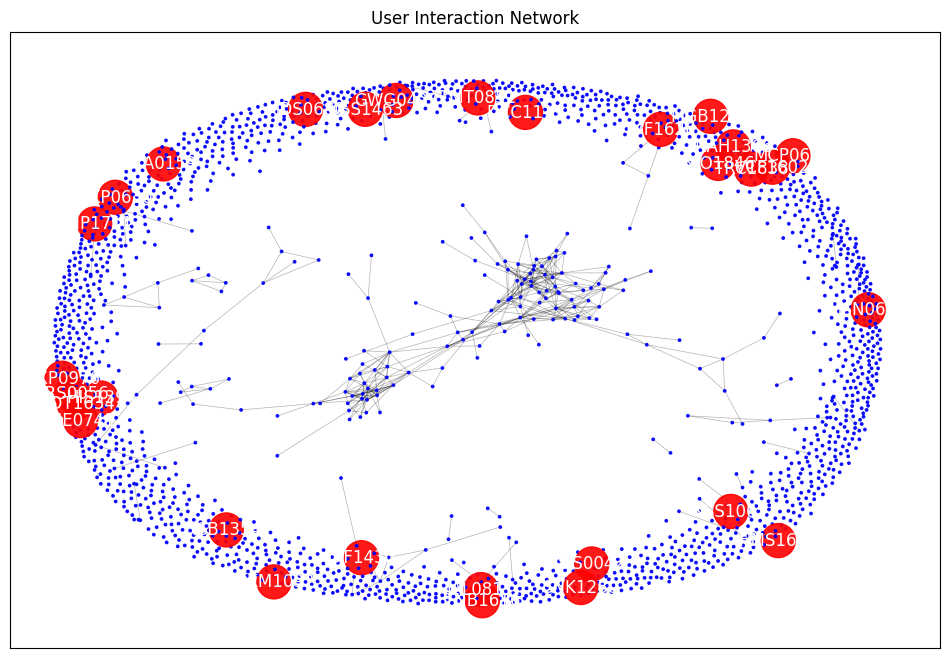

In [16]:
G_highimportancePCAfeatures = pickle.load(open(highimportancepcafeatures_path, 'rb'))
malicious_node_size = 600  # Larger size for visibility
default_node_size = 3
node_colors = [G_highimportancePCAfeatures.nodes[n]['color'] for n in G_highimportancePCAfeatures.nodes()]
node_sizes = [malicious_node_size if data['color'] == 'red' else default_node_size for _, data in G_highimportancePCAfeatures.nodes(data=True)]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_highimportancePCAfeatures, k=0.3, iterations=50)
nx.draw_networkx_nodes(G_highimportancePCAfeatures, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
nx.draw_networkx_edges(G_highimportancePCAfeatures, pos, alpha=0.3, width=0.5)
malicious_labels = {n: n if d['color'] == 'red' else '' for n, d in G_highimportancePCAfeatures.nodes(data=True)}
nx.draw_networkx_labels(G_highimportancePCAfeatures, pos, labels=malicious_labels, font_size=12, font_color='white')

plt.title('User Interaction Network')
plt.show()

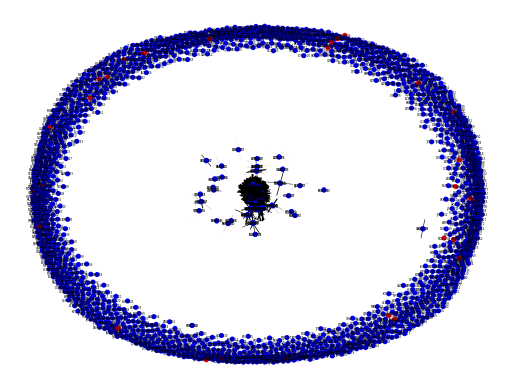

In [17]:
pos = nx.spring_layout(G_highimportancePCAfeatures)  # positions for all nodes
colors = [node[1]['color'] for node in G_highimportancePCAfeatures.nodes(data=True)]

# nodes
nx.draw_networkx_nodes(G_highimportancePCAfeatures, pos, node_color=colors, node_size=7)

# edges
weights = [G_highimportancePCAfeatures[u][v]['weight'] for u, v in G_highimportancePCAfeatures.edges()]
nx.draw_networkx_edges(G_highimportancePCAfeatures, pos, width=weights)

# labels
nx.draw_networkx_labels(G_highimportancePCAfeatures, pos, font_size=2, font_family='sans-serif')

plt.axis('off')  
plt.show()  

too complex

Archive


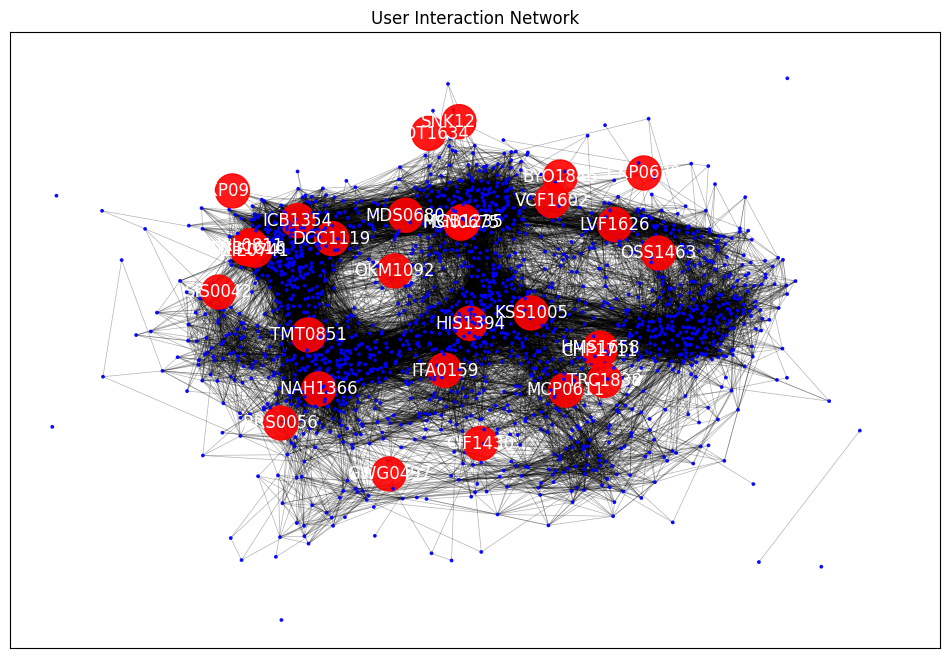

In [ ]:
malicious_node_size = 600  # Larger size for visibility
default_node_size = 3
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
node_sizes = [malicious_node_size if data['color'] == 'red' else default_node_size for _, data in G.nodes(data=True)]

plt.figure(figsize=(12, 8))

# Generate a spring layout with increased space between nodes
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Adjust k and iterations for better spacing

# Draw nodes with higher opacity for visibility
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)

# Draw edges with reduced width and transparency
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)

# Draw labels for malicious nodes with a larger font size and white font color for visibility
malicious_labels = {n: n if d['color'] == 'red' else '' for n, d in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=malicious_labels, font_size=12, font_color='white')

# Add a title and show the plot without axis for a cleaner look
plt.title('User Interaction Network')
# plt.axis('off')  # Hide the axis for a neater presentation
plt.show()